In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

## Binance

In [98]:
exchange = 'Binance'

path = '/Volumes/external_SSD/copulaData/%s_cleaned/'%exchange
picPath =  '/Volumes/external_SSD/copulaData/pics/'
preprocessedpath = '/Volumes/external_SSD/copulaData/%s_preprocessed/'%exchange
readyPath = '/Volumes/external_SSD/copulaData/%s_ready/'%exchange



ls = [l for l in os.listdir(path) if l.endswith('.csv')]

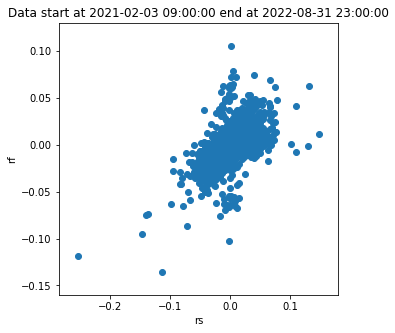

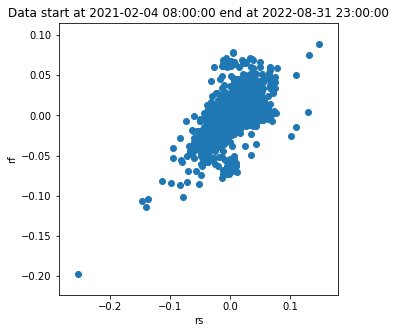

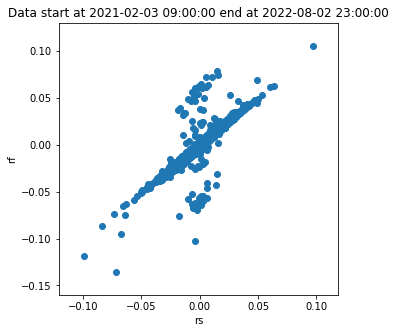

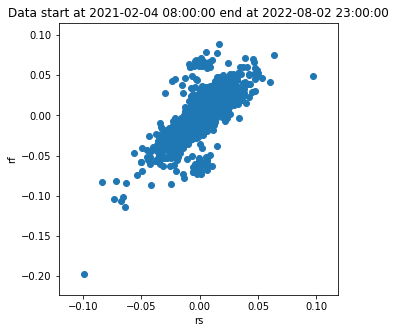

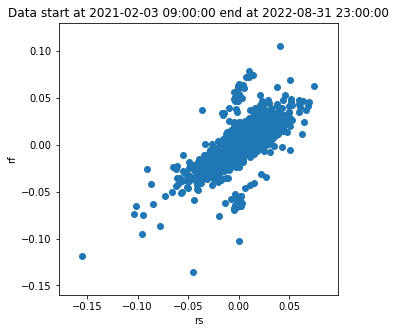

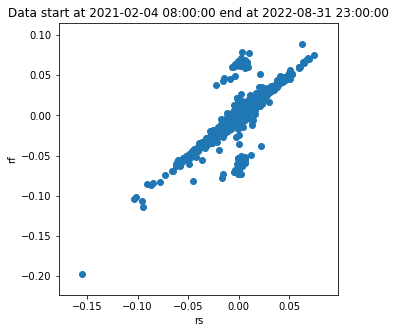

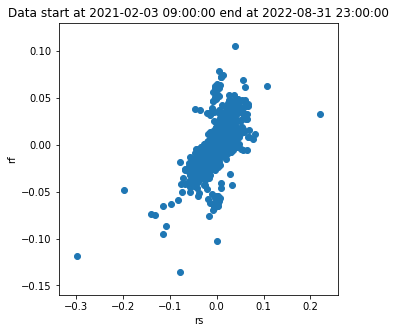

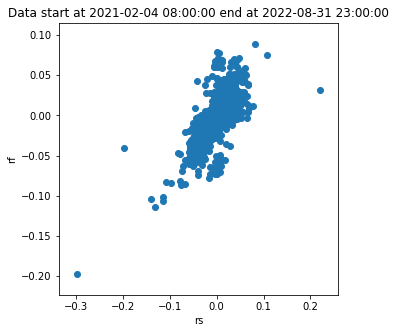

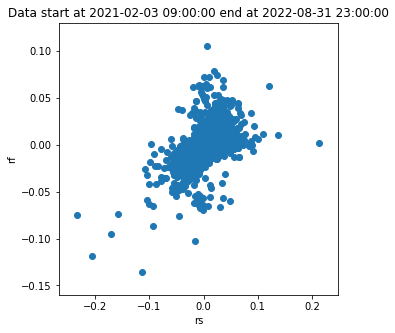

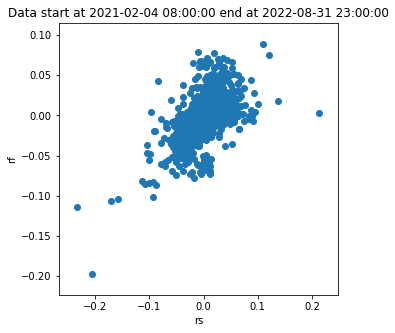

In [99]:
for fileName in ls:
    df = pd.read_csv(path+fileName)
    df.rename(columns={'Unnamed: 0':'timestamp'}, inplace=True)
    df.timestamp = pd.to_datetime(df.timestamp)
    df.sort_values('timestamp', inplace=True)

    rs = np.log(df.spot/df.spot.shift(1))
    rf = np.log(df.futures/df.futures.shift(1))

    result = pd.DataFrame({'rs':rs, 'rf':rf})
    result.loc[:, 'timestamp'] = df.timestamp
    result = result.loc[1:, ['timestamp', 'rs', 'rf']].reset_index(drop=True)

    startTime = min(result.timestamp)
    endTime = max(result.timestamp)
    title = 'Data start at '+str(startTime)+' end at '+str(endTime)

    plt.figure(figsize=(5,5))
    plt.scatter(result.rs, result.rf)
    plt.xlabel('rs')
    plt.ylabel('rf')
    plt.title(title)
    plt.savefig(picPath+exchange+'_'+fileName.replace('.csv','.png'), transparent=True)
    result.to_csv(preprocessedpath+fileName)

In [148]:
fileName = ls[3]
result = pd.read_csv(preprocessedpath+fileName)

result

,Unnamed: 0,timestamp,rs,rf
0,0,2021-02-04 08:00:00,-0.011929,-0.006958
1,1,2021-02-04 09:00:00,0.003062,-0.004234
2,2,2021-02-04 10:00:00,0.002747,0.004096
3,3,2021-02-04 11:00:00,-0.007788,-0.015947
4,4,2021-02-04 12:00:00,0.008162,-0.005496
...,...,...,...,...
13019,13019,2022-08-02 19:00:00,-0.001629,0.000103
13020,13020,2022-08-02 20:00:00,0.003538,0.009933
13021,13021,2022-08-02 21:00:00,0.002694,0.002251
13022,13022,2022-08-02 22:00:00,0.000546,-0.005723


BTCUSDT_ETHUSDT.csv


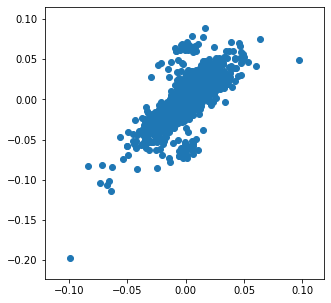

In [149]:
print(fileName)
plt.figure(figsize=(5,5))
plt.scatter(result.rs, result.rf)

In [151]:
for fileName in ls:
    print(fileName)
    result = pd.read_csv(preprocessedpath+fileName)

    readyPath2 = readyPath + fileName.replace('.csv', '') + '/'
    trainPath = readyPath2+'train/'
    testPath = readyPath2+'test/'

    try:
        os.mkdir(readyPath2)
        os.mkdir(trainPath)
        os.mkdir(testPath)
    except FileExistsError:
        continue

    train_size = 300 
    test_size = 5
    step_size = 5

    length = len(result)
    train_arr = []
    test_arr = []


    for i in range(length)[::step_size]:
        train = result.iloc[i:i+train_size]
        test = result.iloc[i+train_size:i+train_size+test_size]
        train_arr.append(train)
        test_arr.append(test)


    train_arr_cleaned = []    
    test_arr_cleaned = []    


    for i in range(len(train_arr)):
        if (len(train_arr[i])==train_size) & (len(test_arr[i])==test_size):
            train_arr_cleaned.append(train_arr[i])
            test_arr_cleaned.append(test_arr[i])


    for i in range(len(train_arr_cleaned)):
        train = train_arr_cleaned[i]
        test = test_arr_cleaned[i]

        train.to_csv(trainPath+str(i)+'.csv')
        test.to_csv(testPath+str(i)+'.csv')

    # train_arr = [t for t in train_arr if len(t)==train_size]
    # test_arr = [t for t in test_arr if len(t)==test_size]


ADAUSDT_BTCUSDT.csv
ADAUSDT_ETHUSDT.csv
BTCUSDT_BTCUSDT.csv
BTCUSDT_ETHUSDT.csv
ETHUSDT_BTCUSDT.csv
ETHUSDT_ETHUSDT.csv
LTCUSDT_BTCUSDT.csv
LTCUSDT_ETHUSDT.csv
XRPUSDT_BTCUSDT.csv
XRPUSDT_ETHUSDT.csv


## Deribit

In [208]:
exchange = 'Deribit'

path = '/Volumes/external_SSD/copulaData/%s_cleaned/'%exchange
picPath =  '/Volumes/external_SSD/copulaData/pics/'
preprocessedpath = '/Volumes/external_SSD/copulaData/%s_preprocessed/'%exchange
readyPath = '/Volumes/external_SSD/copulaData/%s_ready/'%exchange



ls = [l for l in os.listdir(path) if l.endswith('.csv')]

In [209]:
BTC = pd.read_csv(path + ls[0], index_col=0)
ETH = pd.read_csv(path + ls[1], index_col=0)
BTC.datetime = pd.to_datetime(BTC.datetime)
ETH.datetime = pd.to_datetime(ETH.datetime)


In [210]:
startDate = '2019-10-21'
endDate = '2021-05-27'
_id = (BTC.datetime > startDate) & (BTC.datetime < endDate)
BTC = BTC.loc[_id]

_id = (ETH.datetime > startDate) & (ETH.datetime < endDate)
ETH = ETH.loc[_id]

In [211]:
ETHUSD_BTCUSD = BTC.merge(ETH, on='datetime')
ETHUSD_BTCUSD = ETHUSD_BTCUSD.loc[:, ['datetime', 'index_price_y', 'open_x', 'instrument_name_x']]
ETHUSD_BTCUSD.columns = ['datetime', 'ETH_index', 'BTC_futures_open', 'futures_name']
# ETHUSD_BTCUSD

In [212]:
# BTC = BTC.loc[:, ['datetime', '']]
BTC.columns = ['futures_name', 'BTC_futures_open', 'BTC_index', 'datetime']
BTCUSD_BTCUSD = BTC.loc[:, ['datetime', 'BTC_index', 'BTC_futures_open', 'futures_name']].copy()

In [213]:
BTCUSD_BTCUSD.sort_values('datetime', inplace=True)
ETHUSD_BTCUSD.sort_values('datetime', inplace=True)

In [214]:
rs = np.log(BTCUSD_BTCUSD.BTC_index/BTCUSD_BTCUSD.BTC_index.shift(1))
rf = np.log(BTCUSD_BTCUSD.BTC_futures_open/BTCUSD_BTCUSD.BTC_futures_open.shift(1))

BTCUSD_BTCUSD_logReturns = pd.DataFrame({
    'timestamp': BTCUSD_BTCUSD.datetime, 
    'rs':rs,
    'rf':rf
})

BTCUSD_BTCUSD_logReturns = BTCUSD_BTCUSD_logReturns.loc[1:, :].reset_index(drop=True)

In [215]:
rs = np.log(ETHUSD_BTCUSD.ETH_index/ETHUSD_BTCUSD.ETH_index.shift(1))
rf = np.log(ETHUSD_BTCUSD.BTC_futures_open/ETHUSD_BTCUSD.BTC_futures_open.shift(1))

ETHUSD_BTCUSD_logReturns = pd.DataFrame({
    'timestamp': ETHUSD_BTCUSD.datetime, 
    'rs':rs,
    'rf':rf
})

ETHUSD_BTCUSD_logReturns = ETHUSD_BTCUSD_logReturns.loc[1:, :].reset_index(drop=True)

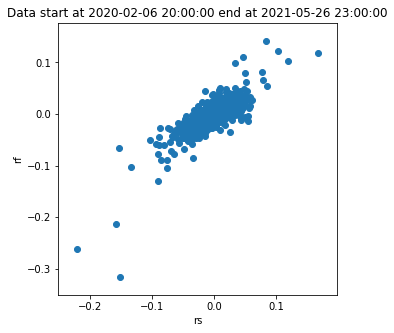

In [222]:
df = ETHUSD_BTCUSD_logReturns.copy()
plt.figure(figsize=(5,5))
plt.scatter(df.rs, df.rf)
plt.xlabel('rs')
plt.ylabel('rf')

startTime = min(df.timestamp)
endTime = max(df.timestamp)

title = 'Data start at '+str(startTime)+' end at '+str(endTime)
plt.title(title)
plt.savefig(picPath+'Deribit_ETHUSD_BTCUSD.png', transparent=True)



df.to_csv(preprocessedpath+'ETHUSD_BTCUSD.csv')

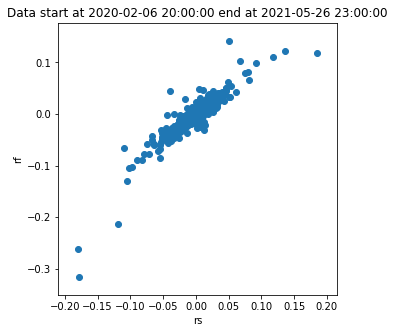

In [223]:
df = BTCUSD_BTCUSD_logReturns.copy()
plt.figure(figsize=(5,5))
plt.scatter(df.rs, df.rf)
plt.xlabel('rs')
plt.ylabel('rf')

startTime = min(df.timestamp)
endTime = max(df.timestamp)

title = 'Data start at '+str(startTime)+' end at '+str(endTime)
plt.title(title)
plt.savefig(picPath+'Deribit_BTCUSD_BTCUSD.png', transparent=True)

df.to_csv(preprocessedpath+'BTCUSD_BTCUSD.csv')

In [225]:
readyPath

'/Volumes/external_SSD/copulaData/Deribit_ready/'

In [231]:
readyPath2 = readyPath + 'BTCUSD_BTCUSD/'
trainPath = readyPath2+'train/'
testPath = readyPath2+'test/'

try:
    os.mkdir(readyPath2)
    os.mkdir(trainPath)
    os.mkdir(testPath)
    
except FileExistsError:
    print('folders exist')

train_size = 300 
test_size = 5
step_size = 5

length = len(result)
train_arr = []
test_arr = []


for i in range(length)[::step_size]:
    train = BTCUSD_BTCUSD_logReturns.iloc[i:i+train_size]
    test = BTCUSD_BTCUSD_logReturns.iloc[i+train_size:i+train_size+test_size]
    train_arr.append(train)
    test_arr.append(test)


train_arr_cleaned = []    
test_arr_cleaned = []    


for i in range(len(train_arr)):
    if (len(train_arr[i])==train_size) & (len(test_arr[i])==test_size):
        train_arr_cleaned.append(train_arr[i])
        test_arr_cleaned.append(test_arr[i])


for i in range(len(train_arr_cleaned)):
    train = train_arr_cleaned[i]
    test = test_arr_cleaned[i]

    train.to_csv(trainPath+str(i)+'.csv')
    test.to_csv(testPath+str(i)+'.csv')

In [240]:
readyPath2 = readyPath + 'ETHUSD_BTCUSD/'
trainPath = readyPath2+'train/'
testPath = readyPath2+'test/'

try:
    os.mkdir(readyPath2)
    os.mkdir(trainPath)
    os.mkdir(testPath)
    
except FileExistsError:
    print('folders exist')

train_size = 300 
test_size = 5
step_size = 5

length = len(result)
train_arr = []
test_arr = []


for i in range(length)[::step_size]:
    train = ETHUSD_BTCUSD_logReturns.iloc[i:i+train_size]
    test = ETHUSD_BTCUSD_logReturns.iloc[i+train_size:i+train_size+test_size]
    train_arr.append(train)
    test_arr.append(test)

train_arr_cleaned = []    
test_arr_cleaned = []    


for i in range(len(train_arr)):
    if (len(train_arr[i])==train_size) & (len(test_arr[i])==test_size):
        train_arr_cleaned.append(train_arr[i])
        test_arr_cleaned.append(test_arr[i])


for i in range(len(train_arr_cleaned)):
    train = train_arr_cleaned[i]
    test = test_arr_cleaned[i]

    train.to_csv(trainPath+str(i)+'.csv')
    test.to_csv(testPath+str(i)+'.csv')

In [245]:
print(min(ETHUSD_BTCUSD_logReturns.timestamp)
,max(ETHUSD_BTCUSD_logReturns.timestamp))

2020-02-06 20:00:00 2021-05-26 23:00:00


In [246]:
print(min(BTCUSD_BTCUSD_logReturns.timestamp)
,max(BTCUSD_BTCUSD_logReturns.timestamp))

2020-02-06 20:00:00 2021-05-26 23:00:00
